In [ ]:
import pandas as pd
data = pd.read_excel('/content/dataset_PSO.xlsx')

In [ ]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
sales_data = data[['Title', 'Volume Sales']].values.tolist()

In [ ]:
# Fungsi Quick Sort Rekursif
def quick_sort_recursive(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2][1]  # Access the 'Volume Sales'
    left = [x for x in arr if x[1] < pivot]
    middle = [x for x in arr if x[1] == pivot]
    right = [x for x in arr if x[1] > pivot]
    return quick_sort_recursive(left) + middle + quick_sort_recursive(right)

In [ ]:
# Fungsi Quick Sort Iteratif
def quick_sort_iterative(arr):
    stack = [arr]
    sorted_arr = []
    while stack:
        sublist = stack.pop()
        if len(sublist) <= 1:
            sorted_arr.extend(sublist)
        else:
            pivot = sublist[len(sublist) // 2][1]
            left = [x for x in sublist if x[1] < pivot]
            middle = [x for x in sublist if x[1] == pivot]
            right = [x for x in sublist if x[1] > pivot]
            stack.extend([right, middle, left])
    return sorted_arr

In [ ]:
# Fungsi untuk mencetak tabel dengan PrettyTable
def print_execution_table():
    table = PrettyTable()
    table.field_names = ["N", "Recursive Time (s)", "Iterative Time (s)"]
    for i in range(len(n_values)):
        table.add_row([n_values[i], f"{recursive_times[i]:.6f}", f"{iterative_times[i]:.6f}"])
    print(table)

In [ ]:
# Fungsi untuk memperbarui grafik
def update_graph():
    plt.figure(figsize=(10, 5))
    plt.plot(n_values, recursive_times, label="Recursive", marker='o')
    plt.plot(n_values, iterative_times, label="Iterative", marker='s')
    plt.xlabel("Input Size (N)")
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time: Recursive vs Iterative QuickSort")
    plt.legend()
    plt.grid()
    plt.show()

Masukkan nilai n yang ingin diuji satu per satu.
Ketik -1 untuk menyelesaikan input dan menampilkan grafik.
Masukkan nilai n (atau ketik -1 untuk selesai): 2
Data untuk n=2 telah ditambahkan.
Masukkan nilai n (atau ketik -1 untuk selesai): 4
Data untuk n=4 telah ditambahkan.
Masukkan nilai n (atau ketik -1 untuk selesai): 7
Data untuk n=7 telah ditambahkan.
Masukkan nilai n (atau ketik -1 untuk selesai): 10
Data untuk n=10 telah ditambahkan.
Masukkan nilai n (atau ketik -1 untuk selesai): 16
Data untuk n=16 telah ditambahkan.
Masukkan nilai n (atau ketik -1 untuk selesai): -1

Semua input selesai. Berikut hasil eksekusi:

+----+--------------------+--------------------+
| N  | Recursive Time (s) | Iterative Time (s) |
+----+--------------------+--------------------+
| 2  |      0.000013      |      0.000011      |
| 4  |      0.000020      |      0.000016      |
| 7  |      0.000041      |      0.000036      |
| 10 |      0.000051      |      0.000044      |
| 16 |      0.000072      |

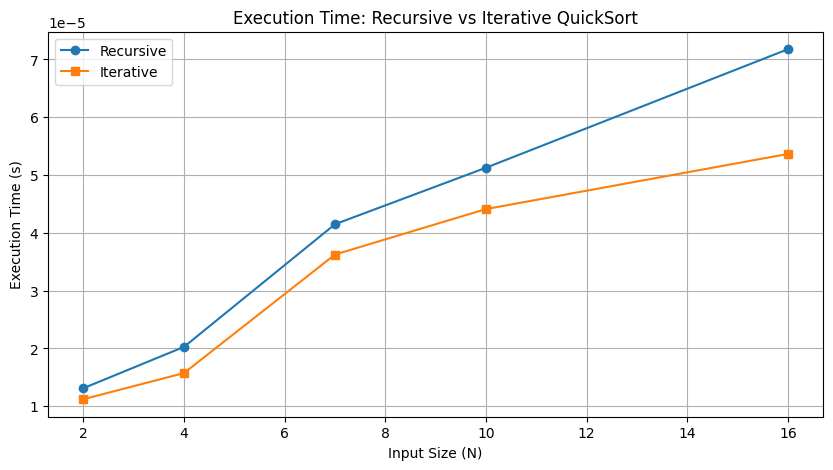

In [ ]:
# Variabel Global untuk menyimpan data pengukuran waktu
n_values = []
recursive_times = []
iterative_times = []

# Program utama
try:
    print("Masukkan nilai n yang ingin diuji satu per satu.")
    print("Ketik -1 untuk menyelesaikan input dan menampilkan grafik.")

    while True:
        n = int(input("Masukkan nilai n (atau ketik -1 untuk selesai): "))
        if n == -1:
            if len(n_values) == 0:
                print("Tidak ada nilai n yang diinput. Program selesai.")
                break
            print("\nSemua input selesai. Berikut hasil eksekusi:\n")
            # mencetak tabel waktu eksekusi
            print_execution_table()
            # memperbarui grafik
            update_graph()
            break

        if n < 0:
            print("Masukkan nilai n yang positif atau ketik -1 untuk selesai!")
            continue

        if n > len(sales_data):
            print(f"Masukkan nilai n yang lebih kecil atau sama dengan {len(sales_data)}!")
            continue

        # menambahkan nilai n ke daftar
        n_values.append(n)

        # mengukur waktu eksekusi algoritma rekursif
        start_time = time.time()
        quick_sort_recursive(sales_data[:n])
        recursive_times.append(time.time() - start_time)

        # mengukur waktu eksekusi algoritma iteratif
        start_time = time.time()
        quick_sort_iterative(sales_data[:n])
        iterative_times.append(time.time() - start_time)

        print(f"Data untuk n={n} telah ditambahkan.")

except ValueError:
    print("Masukkan nilai n yang valid!")